In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)




In [2]:
# Combine the data into a single dataset
merge_table = pd.merge(city_data_df, ride_data_df, how ='left', on="city")

# Display the data table for preview
merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
#Filtering the merge_table dataframe by the "type" column corresponding the Urban data
urban_data = merge_table[merge_table['type'] == 'Urban']

In [4]:
#Grouping the data by "city" and calculating the count of rides
urban_ride_count = urban_data.groupby(['city']).count()['ride_id']

In [5]:
#Grouping the data by "city" and calculating the average fare
urban_average_fare = urban_data.groupby(['city']).mean()['fare']

In [6]:
#Calculating the average driver count by city 
urban_driver_count = urban_data.groupby(['city']).mean()['driver_count']


In [7]:
#Filtering the merge_table dataframe by the "type" column corresponding the Rural data
rural_data = merge_table[merge_table['type'] == 'Rural']
#Grouping the data by "city" and calculating the count of rides
rural_ride_count = rural_data.groupby(['city']).count()['ride_id']
#Grouping the data by "city" and calculating the average fare
rural_average_fare = rural_data.groupby(['city']).mean()['fare']
#Calculating the average driver count by city 
rural_driver_count = rural_data.groupby(['city']).mean()['driver_count']

In [8]:
#Filtering the merge_table dataframe by the "type" column corresponding the Surburban data
Suburban_data = merge_table[merge_table['type'] == 'Suburban']

#Grouping the data by "city" and calculating the count of rides
Suburban_ride_count = Suburban_data.groupby(['city']).count()['ride_id']

#Grouping the data by "city" and calculating the average fare
Suburban_average_fare = Suburban_data.groupby(['city']).mean()['fare']

#Calculating the average driver count by city 
Suburban_driver_count = Suburban_data.groupby(['city']).mean()['driver_count']

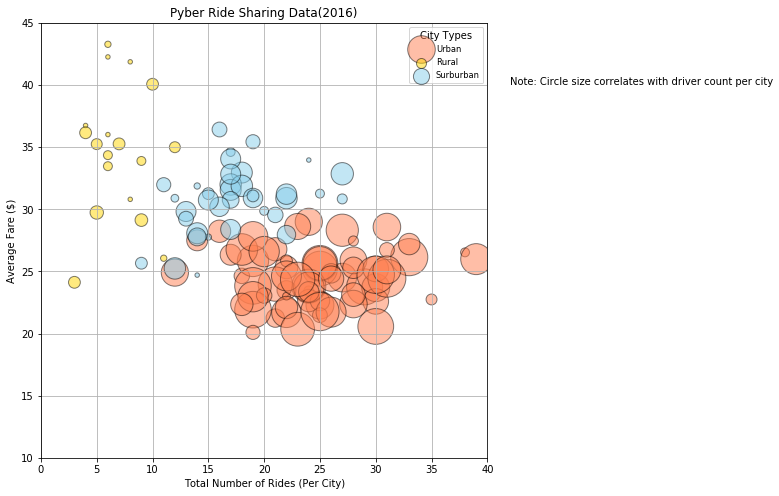

In [9]:
#Ploting the calculations above using a bubble plot 
plt.figure(figsize=(8,8))
Urban = plt.scatter(urban_ride_count, urban_average_fare,linewidths= 1, label= 'Urban', marker="o", c="coral", edgecolors="black",
       s=urban_driver_count*20, alpha=0.5)


Rural = plt.scatter(rural_ride_count, rural_average_fare,linewidths= 1, label= 'Rural', marker="o", c="gold", edgecolors="black",
           s=rural_driver_count*20, alpha=0.5)


Surburban = plt.scatter(Suburban_ride_count, Suburban_average_fare,linewidths= 1, label= 'Surburban',  marker="o", c="skyblue", edgecolors="black",
            s=Suburban_driver_count*20, alpha=0.5)

plt.legend(handles=[Urban, Rural, Surburban], fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,loc="best", title="City Types")


plt.xlim(0,40)
plt.ylim(10,45)


plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data(2016)')

plt.text(42,40, 'Note: Circle size correlates with driver count per city',# ha='center', va='center',
        horizontalalignment="left")
plt.grid()


plt.show()

In [10]:
# Show plot
plt.show()

In [11]:
# Save Figure
plt.savefig("../Images Pyber/BubblePlot.png")

<Figure size 432x288 with 0 Axes>

Observation 
Based on 'Pyber Ride Sharing Data(2016)' scatter plot, we see that Urban cities have greatest number of drivers and rides, but they have lowest average fare. We see that suburban cities have average number of drivers and rides and they have an average fare. We also see that rural cities have smalest number of drivers and rides, but they have greatest average fare. 

In conclusion, rides and drivers are not too avalaible in rural cities, which is making the fares more expensive. Rides and drivers are somewhat available in suburban cities, which is making the fares have an average rate. Rides and drivers are really available in urban cities, which is making the fares cheaper.    

## Total Fares by City Type

In [12]:
# Calculate percentage of fare based on the city type
Total_Each_type = merge_table.groupby('type')['fare'].sum()
Total_Each_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

Text(0.5, 1.0, '% of Total Fares by City Type')

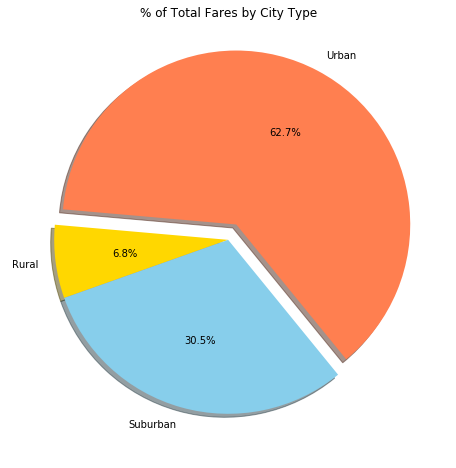

In [13]:
# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['gold','skyblue','coral']
explode = (0,0,.1)
plt.figure(figsize=(8,8))
plt.pie(Total_Each_type, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=175)
plt.title("% of Total Fares by City Type")



In [14]:
# Show Figure
plt.show()

In [15]:
# Save Figure
plt.savefig("../Images Pyber/TotalFares.png")

<Figure size 432x288 with 0 Axes>

Observation 
In conclusion, percent total fare is the greatest in urban cities (62.7%), percent total fares is the second greatest in suburban cities (30.5%), and percent total fare is the lowest in rural cities (6.8%).  

## Total Rides by City Type

In [16]:
# Calculate percentage of number of fares based on the city type
Total_Rides_type = merge_table.groupby('type')['ride_id'].count()
Total_Rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

Text(0.5, 1.0, '% of Total Rides by City Type')

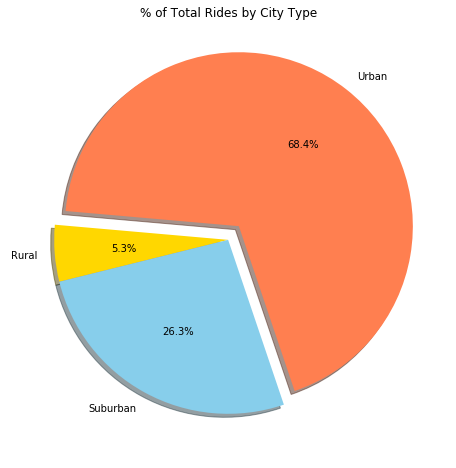

In [17]:
# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['gold','skyblue','coral']
explode = (0,0,.1)
plt.figure(figsize=(8,8))
plt.pie(Total_Rides_type, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=175)
plt.title("% of Total Rides by City Type")



In [18]:
# Show Figure
plt.show()

In [19]:
# Save Figure
plt.savefig("../Images Pyber/TotalRide.png")

<Figure size 432x288 with 0 Axes>

Observation 
In conclusion, percent total ride is the greatest in urban cities (68.4%), percent total ride is the second greatest in suburban cities (26.3%), and percent total ride is the lowest in rural cities (5.3%).  

## Total Drivers by City Type

In [20]:
# Calculate percentage of number of drivers based on the city type
total_driver_count = city_data_df.groupby('type')['driver_count'].sum()
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

Text(0.5, 1.0, '% of Total Drivers by City Type')

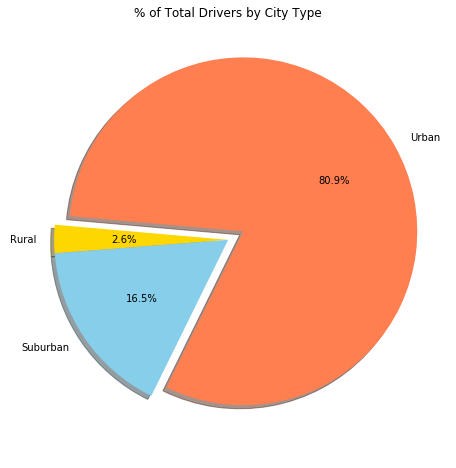

In [21]:
# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['gold','skyblue','coral']
explode = (0,0,.1)
plt.figure(figsize=(8,8))
plt.pie(total_driver_count, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=175)
plt.title("% of Total Drivers by City Type")





In [22]:
# Show Figure
plt.show()

In [23]:
# Save Figure
plt.savefig("../Images Pyber/TotalDrivers.png")


<Figure size 432x288 with 0 Axes>

Observation 
In conclusion, percent total drivers is the greatest in urban cities (80.9%), percent total drivers is the second greatest in suburban cities (16.8%), and percent total drivers is the lowest in rural cities (2.6%).  

In conclusion, rides and drivers are not too avalaible in rural cities, which is making the fares more expensive. Rides and drivers are somewhat available in suburban cities, which is making the fares have an average rate. Rides and drivers are really available in urban cities, which is making the fares cheaper.